In [3]:
# ---------------------------------------
# Step 1: Import Required Libraries
# ---------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import FunctionTransformer
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler






In [4]:
# ---------------------------------------
# Step 2: Load the Dataset
# ---------------------------------------
# Replace path with your local path if different
df = pd.read_csv("student_score_dataset_10000.csv")

# Preview the data
df.head()


,Study Hours,Sleep Hours,Assignment Submitted,Topics to Cover,Topic Difficulty,Learning Capacity,Previous Test Score,Class Participation,Concentration Level,Distraction Time,Health Status,Study Environment,Revision Done,Time Left for Exam,Practice Tests Taken,Topic Familiarity,Predicted Score
0,9,7.2,Yes,3,High,Medium,83,Low,5,3.9,Healthy,Distracting,Yes,1,3,Revision,100.0
1,9,4.8,Yes,3,High,Low,44,Medium,2,1.7,Sick,Distracting,Yes,4,3,First Time,75.2
2,0,6.1,Yes,4,High,Low,59,Low,4,2.2,Okay,Distracting,Yes,0,0,Revision,39.8
3,8,7.1,Yes,1,High,Low,87,Low,5,0.0,Sick,Distracting,Yes,0,1,First Time,80.8
4,3,7.9,No,1,Low,Medium,74,Medium,4,0.0,Healthy,Distracting,Yes,0,3,First Time,69.2


In [5]:
# ---------------------------------------
# Step 3: Data Overview & Missing Values
# ---------------------------------------
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())


Shape of dataset: (10000, 17)

Data types:
 Study Hours               int64
Sleep Hours             float64
Assignment Submitted     object
Topics to Cover           int64
Topic Difficulty         object
Learning Capacity        object
Previous Test Score       int64
Class Participation      object
Concentration Level       int64
Distraction Time        float64
Health Status            object
Study Environment        object
Revision Done            object
Time Left for Exam        int64
Practice Tests Taken      int64
Topic Familiarity        object
Predicted Score         float64
dtype: object

Missing values:
 Study Hours             0
Sleep Hours             0
Assignment Submitted    0
Topics to Cover         0
Topic Difficulty        0
Learning Capacity       0
Previous Test Score     0
Class Participation     0
Concentration Level     0
Distraction Time        0
Health Status           0
Study Environment       0
Revision Done           0
Time Left for Exam      0
Practice Tests T

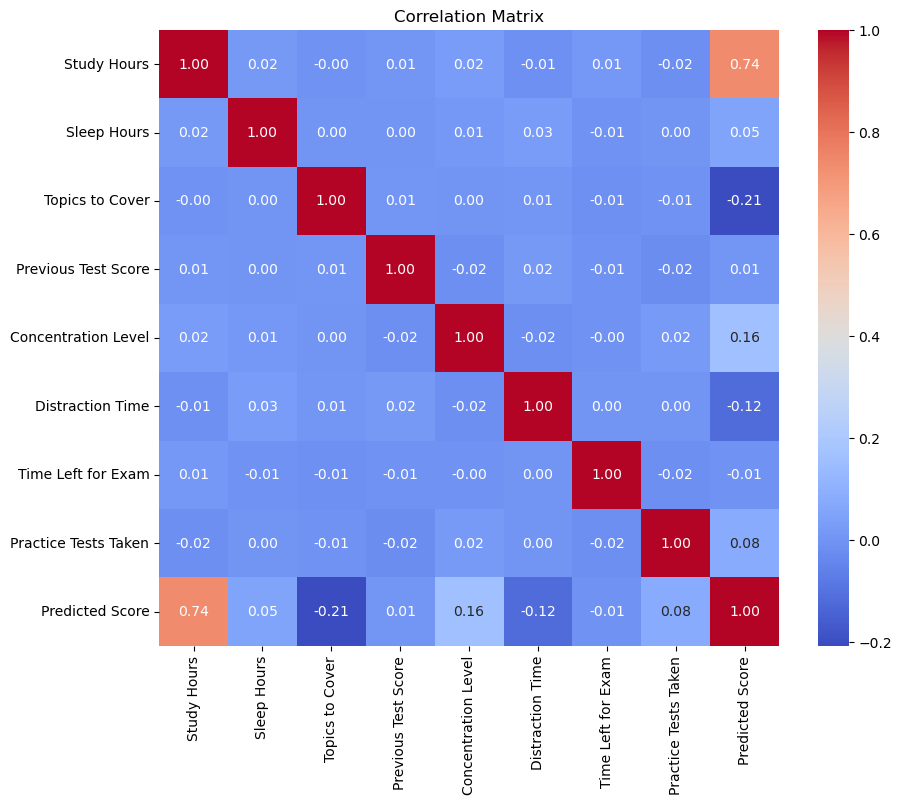

In [6]:
# ---------------------------------------
# Step 4: Correlation Matrix (Numeric Features)
# ---------------------------------------
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [7]:
 
# --- Feature groups ---
numeric_cols = ['Study Hours', 'Sleep Hours', 'Topics to Cover', 'Previous Test Score',
                'Concentration Level', 'Distraction Time', 'Time Left for Exam', 'Practice Tests Taken']

categorical_cols = ['Assignment Submitted', 'Topic Difficulty', 'Learning Capacity', 
                    'Class Participation', 'Health Status', 'Study Environment',
                    'Revision Done', 'Topic Familiarity']

# --- Define function for interaction features ---
def add_interaction_features(X):
    X = X.copy()
    # Assume all necessary columns are present
    X['Effective Study Time'] = X['Study Hours'] * X['Concentration Level'] / (X['Distraction Time'] + 1)
    X['Revision Boost'] = (X['Revision Done'] == 'Yes').astype(int) * 5
    X['Sleep Efficiency'] = X['Sleep Hours'] / (X['Distraction Time'] + 1)
     # NEW: Sleep Optimality feature to capture too much or too little sleep effect
    def sleep_effect(sleep):
        if sleep < 6:
            return sleep - 6
        elif sleep > 8:
            return 8 - sleep
        else:
            return 0
    X['Sleep Optimality'] = X['Sleep Hours'].apply(sleep_effect)
    return X

# --- Preprocessing pipelines ---
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# --- Full preprocessor ---
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# --- Full model pipeline with interaction step ---
model_pipeline = Pipeline(steps=[
    ('feature_engineering', FunctionTransformer(add_interaction_features, validate=False)),
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])



In [8]:
# Assuming your dataframe is called df and target column is 'Predicted Score'
X = df.drop(columns=['Predicted Score'])
y = df['Predicted Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# ---------------------------------------
# Step 8: Train the Model
# ---------------------------------------
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('feature_engineering',
                 FunctionTransformer(func=<function add_interaction_features at 0x000001F48BD4D300>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Study Hours', 'Sleep Hours',
                                                   'Topics to Cover',
                                                   'Previous Test Score',
                                                   'Concentration Level',
                                                   'Distraction Time...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [10]:
# ---------------------------------------
# Step 9: Evaluate the Model
# ---------------------------------------
y_pred = model_pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 1.80
R² Score: 0.99


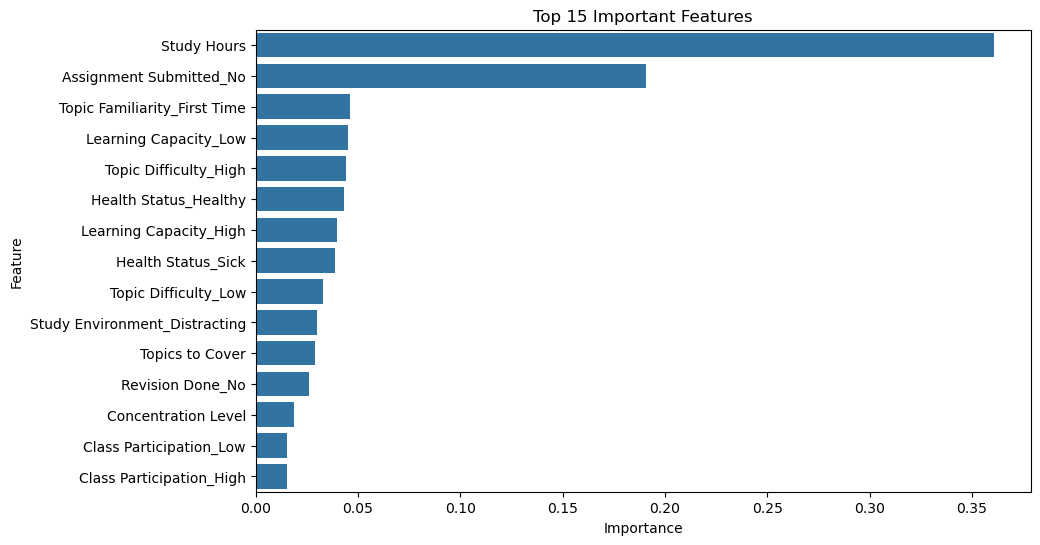

In [11]:
# ---------------------------------------
# Optional: Feature Importance (basic version)
# ---------------------------------------
# Get feature names after one-hot encoding
encoded_cols = model_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([numeric_cols, encoded_cols])

# Get feature importances
importances = model_pipeline.named_steps['regressor'].feature_importances_

# Create dataframe for plotting
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 15
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
plt.title('Top 15 Important Features')
plt.show()


In [12]:
df.head()

,Study Hours,Sleep Hours,Assignment Submitted,Topics to Cover,Topic Difficulty,Learning Capacity,Previous Test Score,Class Participation,Concentration Level,Distraction Time,Health Status,Study Environment,Revision Done,Time Left for Exam,Practice Tests Taken,Topic Familiarity,Predicted Score
0,9,7.2,Yes,3,High,Medium,83,Low,5,3.9,Healthy,Distracting,Yes,1,3,Revision,100.0
1,9,4.8,Yes,3,High,Low,44,Medium,2,1.7,Sick,Distracting,Yes,4,3,First Time,75.2
2,0,6.1,Yes,4,High,Low,59,Low,4,2.2,Okay,Distracting,Yes,0,0,Revision,39.8
3,8,7.1,Yes,1,High,Low,87,Low,5,0.0,Sick,Distracting,Yes,0,1,First Time,80.8
4,3,7.9,No,1,Low,Medium,74,Medium,4,0.0,Healthy,Distracting,Yes,0,3,First Time,69.2


In [13]:
# New student data example with all your columns and sample values
new_student = {
    "Study Hours": 7,
    "Sleep Hours":8,
    "Assignment Submitted": "Yes",
    "Topics to Cover": 4,
    "Topic Difficulty": "High",
    "Learning Capacity": "High",
    "Previous Test Score": 98,
    "Class Participation": "High",
    "Concentration Level": 4,
    "Distraction Time": 2,
    "Health Status": "Healthy",
    "Study Environment": "Quiet",
    "Revision Done": "Yes",
    "Time Left for Exam": 20,
    "Practice Tests Taken": 7,
    "Topic Familiarity": "Somewhat Familiar",
}

import pandas as pd

# Convert the dictionary to a DataFrame with one row
new_student_df = pd.DataFrame([new_student])

# Predict using your trained pipeline
predicted_score = model_pipeline.predict(new_student_df)

print(f"Predicted Student Score: {predicted_score[0]:.2f}%")


Predicted Student Score: 101.73%


In [14]:
import joblib
joblib.dump(model_pipeline, 'student_score_model.pkl')


['student_score_model.pkl']